# Loading Packages

In [1]:
pip install -U seaborn

     |████████████████████████████████| 296kB 17.1MB/s eta 0:00:01
  Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data:

### NOAA US Temps

In [3]:
noaa = pd.read_csv('noaa_temp_us.csv', header = 4)
noaa['Date'] =  pd.to_datetime(noaa['Date'], format = '%Y%m')
#.dt.to_period('Y')
noaa.head()

,Date,Value,Anomaly
0,1900-12-01,52.77,0.75
1,1901-12-01,51.87,-0.15
2,1902-12-01,51.59,-0.43
3,1903-12-01,50.62,-1.40
4,1904-12-01,51.16,-0.86


### CDC Mortality Data (1979 - 2016)

In [4]:
e900_0 = pd.read_csv('E900.0_1979-1998.txt', sep='\t').drop(columns = ['Notes', 'Year Code']).dropna()
e900_1 = pd.read_csv('E900.1_1979-1998.txt', sep='\t').drop(columns = ['Notes', 'Year Code']).dropna()
e900_9 = pd.read_csv('E900.9_1979-1998.txt', sep ='\t').drop(columns = ['Notes', 'Year Code']).dropna()
x30 = pd.read_csv('x30_1999-2016.txt', sep="\t").drop(columns = ['Notes', 'Year Code']).dropna()

e900_0['Cause of Death'] = 'E900.0 (Due to weather conditions)'
e900_1['Cause of Death'] = 'E900.1 (Of man-made origin)'
e900_9['Cause of Death'] = 'E900.9 (Of unspecified origin)'
x30['Cause of Death'] = 'X30 (Exposure to excessive natural heat)'

#all_cdc = [e900_0, e900_1, e900_9, x30]
all_cdc = [e900_0, x30]
all_deaths = pd.concat(all_cdc).groupby(['Year', 'Cause of Death']).sum()
all_deaths['prop'] = all_deaths['Deaths']/all_deaths['Population']
all_deaths.reset_index(inplace = True)
all_deaths.head()

,Year,Cause of Death,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Deaths,Population,prop
0,1979.0,E900.0 (Due to weather conditions),0.0,0.0,0.0,54.0,224635398.0,2.403895e-07
1,1980.0,E900.0 (Due to weather conditions),0.3,0.3,0.3,651.0,226624371.0,2.872595e-06
2,1981.0,E900.0 (Due to weather conditions),0.0,0.0,0.1,112.0,229487512.0,4.880440e-07
3,1982.0,E900.0 (Due to weather conditions),0.0,0.0,0.0,75.0,231701425.0,3.236924e-07
4,1983.0,E900.0 (Due to weather conditions),0.1,0.1,0.1,204.0,233781743.0,8.726088e-07


# Analysis + Visualizations:

## Bar Chart/Line plot (Slide 7)

In [5]:
all_deaths['crude_rate'] = all_deaths['prop']*1000000
all_deaths.head()

,Year,Cause of Death,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Deaths,Population,prop,crude_rate
0,1979.0,E900.0 (Due to weather conditions),0.0,0.0,0.0,54.0,224635398.0,2.403895e-07,0.240390
1,1980.0,E900.0 (Due to weather conditions),0.3,0.3,0.3,651.0,226624371.0,2.872595e-06,2.872595
2,1981.0,E900.0 (Due to weather conditions),0.0,0.0,0.1,112.0,229487512.0,4.880440e-07,0.488044
3,1982.0,E900.0 (Due to weather conditions),0.0,0.0,0.0,75.0,231701425.0,3.236924e-07,0.323692
4,1983.0,E900.0 (Due to weather conditions),0.1,0.1,0.1,204.0,233781743.0,8.726088e-07,0.872609


In [6]:
#join cdc dataset w noaa dataset

noaa['Date'] = pd.to_datetime(noaa['Date'])
noaa['Year'] = noaa['Date'].apply(lambda x: x.year)
noaa_1979 = noaa[noaa['Date'] >= '1979']

deaths_temp = noaa_1979.merge(all_deaths, how = 'left', left_on = 'Year', right_on = 'Year')
deaths_temp = deaths_temp[deaths_temp['Year'] <= 2016]
deaths_temp.head()

,Date,Value,Anomaly,Year,Cause of Death,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Deaths,Population,prop,crude_rate
0,1979-12-01,50.88,-1.14,1979,E900.0 (Due to weather conditions),0.0,0.0,0.0,54.0,224635398.0,2.403895e-07,0.240390
1,1980-12-01,52.39,0.37,1980,E900.0 (Due to weather conditions),0.3,0.3,0.3,651.0,226624371.0,2.872595e-06,2.872595
2,1981-12-01,53.12,1.10,1981,E900.0 (Due to weather conditions),0.0,0.0,0.1,112.0,229487512.0,4.880440e-07,0.488044
3,1982-12-01,51.34,-0.68,1982,E900.0 (Due to weather conditions),0.0,0.0,0.0,75.0,231701425.0,3.236924e-07,0.323692
4,1983-12-01,51.88,-0.14,1983,E900.0 (Due to weather conditions),0.1,0.1,0.1,204.0,233781743.0,8.726088e-07,0.872609


In [7]:
#correlation between heat-related deaths and temperature
from scipy.stats import pearsonr

corr, _ = pearsonr(deaths_temp['prop'], deaths_temp['Value'])
corr

0.4609226685856415

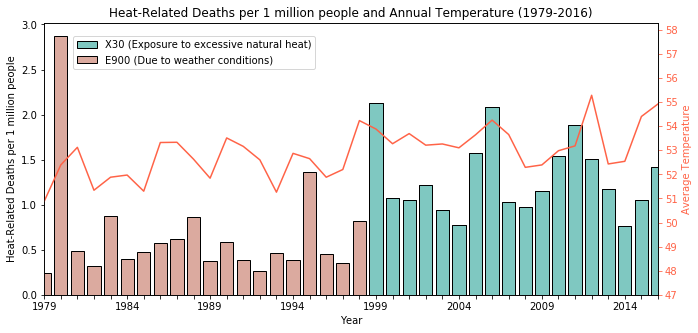

In [8]:
fig, ax = plt.subplots(figsize=(11, 5))
ax = sns.histplot(deaths_temp, x='Year', hue='Cause of Death', weights='crude_rate', discrete = True,
             multiple='stack', palette= ['#b85741', '#009384'], shrink=0.8, legend = True, alpha = 0.5)

ax2 =ax.twinx()
ax2 = sns.lineplot(deaths_temp['Year'], deaths_temp['Value'], ax = ax2, color = 'tomato')
ax2.yaxis.label.set_color('tomato') 
ax2.tick_params(axis='y', colors='tomato')
ax2.set_ylim(deaths_temp['Value'].min() - 3, deaths_temp['Value'].max() + 3)
ax2.set_yticks(range(int(deaths_temp.Value.min()-3), int(deaths_temp.Value.max() + 4)))


ax.set_xlim(deaths_temp.Year.min(), deaths_temp.Year.max())
ax.set_xticks(range(int(deaths_temp.Year.min()), int(deaths_temp.Year.max() + 1)))

#ax2.set_xticklabels([])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xticks(rotation=90, horizontalalignment = 'center')
ax.set_ylabel('Heat-Related Deaths per 1 million people')
ax2.set_ylabel('Average Temperature')
plt.title('Heat-Related Deaths per 1 million people and Annual Temperature (1979-2016)')
#ax.legend(handles = ['E900 (Excessive Heat)', 'E900.1 (Of man-made origin)', 'E900.9 (Of unspecified origin)',
#'X30 (Exposure to excessive natural heat)'], bbox_to_anchor=(1.1, 1.05))
ax.legend(['X30 (Exposure to excessive natural heat)','E900 (Due to weather conditions)'],bbox_to_anchor=(0.45, 0.97))
plt.savefig('heat_deaths.jpeg', dpi=200, bbox_inches='tight')

## Chicago Heat Wave Lineplot (Slide 8)

In [9]:
# load chicago temperature dataset
chicago = pd.read_csv('chicago_1995.csv')
chicago['tavg'] = (chicago['tmax'] + chicago['tmin'])/2
chicago['temp_f'] = (chicago['tavg'] * 9/5) + 32
chicago['date'] = pd.to_datetime(chicago['date'])
chicago['tmax_f'] = (chicago['tmax'] * 9/5) + 32

In [10]:
# load chicago deaths dataset
chicago_deaths = pd.read_csv('heat-deaths_example.csv', header = 6, encoding = "ISO-8859-1")
chicago_deaths['date'] = pd.to_datetime(chicago_deaths[['Year',"Month", "Day"]])

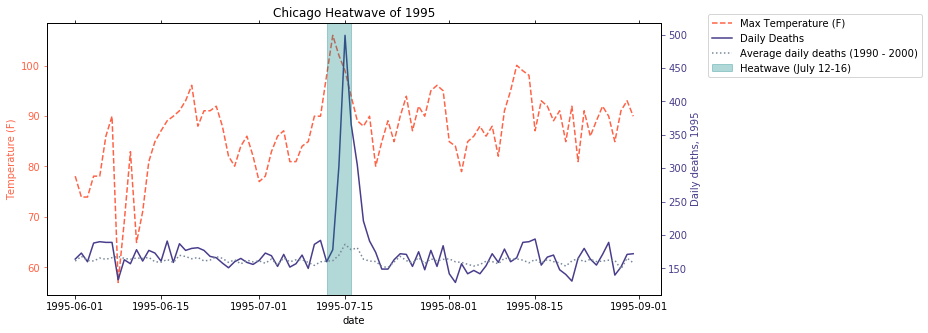

In [11]:
import datetime
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(11, 5))
ax = sns.lineplot(chicago['date'], chicago['tmax_f'], color = 'tomato', linestyle = '--', 
                  label = 'Max Temperature (F)', legend = False)
ax.yaxis.label.set_color('tomato') 
ax.tick_params(axis='y', colors='tomato')
ax.set(ylabel='Temperature (F)')

ax2 = ax.twinx()
ax2 = sns.lineplot(chicago_deaths['date'], chicago_deaths['Daily deaths, 1995'], 
                   color = 'darkslateblue', label = 'Daily Deaths', legend = False)
ax2.yaxis.label.set_color('darkslateblue') 
ax2.tick_params(axis='y', colors='darkslateblue')

ax3 = ax2.twiny()
ax3 = sns.lineplot(chicago_deaths['date'], chicago_deaths['Average daily deaths, 1990-2000'], 
                   color = 'lightslategrey', linestyle = 'dotted', label = 'Average daily deaths (1990 - 2000)', legend = False)
ax3.set(xlabel=None, xticklabels = [])
ax3.tick_params(bottom=False)
start = datetime.datetime (1995,7,12)
end = datetime.datetime (1995,7,16)
ax3.axvspan(mdates.date2num(start), mdates.date2num(end), color='teal', alpha=0.3, label = 'Heatwave (July 12-16)')

handles, labels = [(a + b + c) for a, b, c in zip(ax.get_legend_handles_labels(), 
                                                  ax2.get_legend_handles_labels(), ax3.get_legend_handles_labels())]
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1.05))
plt.title('Chicago Heatwave of 1995')
plt.savefig('chicago.jpeg', dpi=200, bbox_inches='tight')

In [17]:
max_temp_chicago = chicago[chicago['tmax_f'] == max(chicago['tmax_f'])]
max_deaths_chicago = chicago_deaths[chicago_deaths['Daily deaths, 1995'] == max(chicago_deaths['Daily deaths, 1995'])]

## Global Temperature Anomalies (Slide 9)

Text(0.5, 1.0, 'US Temperature Anomalies (1900-2021)')

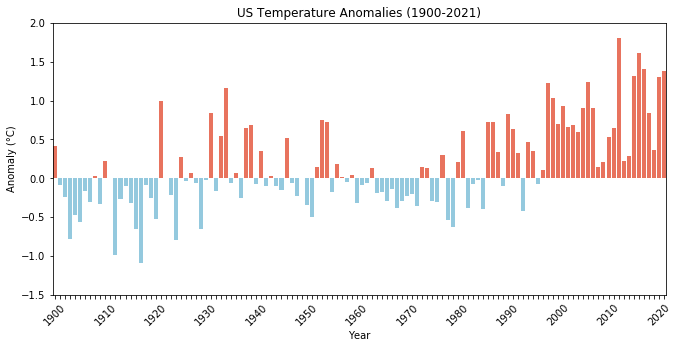

In [13]:
#noaa_global['Anomaly (F)'] = (noaa_global['Value'] * 9/5) + 32
noaa['temp_c'] = (noaa['Value'] - 32) * (5/9)
noaa['anomaly_c'] = noaa['temp_c'] - 11.122222

noaa['positive'] = noaa['anomaly_c'] > 0
fig, ax = plt.subplots(figsize=(11, 5))
sns.barplot(noaa['Year'], noaa['anomaly_c'], palette=(noaa['anomaly_c'] > 0).map({True: 'tomato', False: 'skyblue'}))
plt.xticks(rotation=45, horizontalalignment = 'center')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set_ylim(-1.5, 2)
#ax.set_xticks(range(int(deaths_temp.Year.min()), int(deaths_temp.Year.max() + 1)))
ax.set_ylabel('Anomaly (°C)')
plt.title('US Temperature Anomalies (1900-2021)')

In [14]:
prop_us_1979 = len(noaa_1979[noaa_1979['Anomaly'] > 0])/len(noaa_1979)
max_US_anomaly = max(noaa['Anomaly'])

Text(0, 0.5, 'Anomaly (°C)')

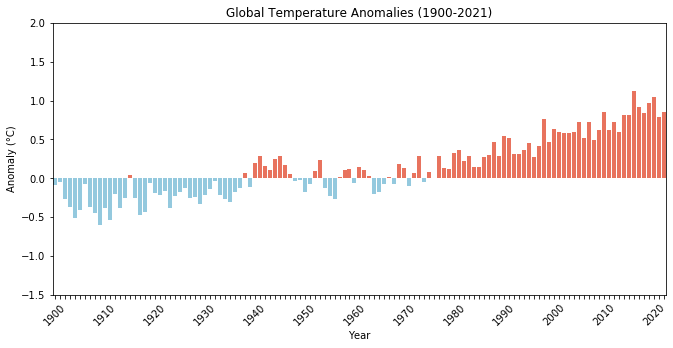

In [15]:
noaa_global = pd.read_csv('noaa_global_temps.csv', header = 4)
noaa_global['positive'] = noaa_global['Value'] > 0
fig, ax = plt.subplots(figsize=(11, 5))
sns.barplot(noaa_global['Year'], noaa_global['Value'], palette=(noaa_global['Value'] > 0).map({True: 'tomato', False: 'skyblue'}))
plt.xticks(rotation=45, horizontalalignment = 'center')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title('Global Temperature Anomalies (1900-2021)')
#plt.savefig('global_temps.jpeg', dpi=300, bbox_inches='tight')
ax.set_ylim(-1.5, 2)
ax.set_ylabel('Anomaly (°C)')
#plt.savefig('global_temps.jpeg', dpi=200, bbox_inches='tight')

In [16]:
noaa_global_1979 = noaa_global[noaa_global['Year'] >= 1979]
prop_global_1979 = len(noaa_global_1979[noaa_global_1979['Value'] > 0])/len(noaa_global_1979)
max_global = max(noaa_global['Value'])